In [19]:
import numpy as np
import json

In [20]:
def needleman_wunsch(seq1, seq2, match=2, mismatch=-1, gap=-1):
    n = len(seq1)
    m = len(seq2)
    score = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        score[i][0] = gap * i
    for j in range(m+1):
        score[0][j] = gap * j

    for i in range(1, n+1):
        for j in range(1, m+1):
            match_score = score[i-1][j-1] + (match if seq1[i-1]['word'] == seq2[j-1]['word'] else mismatch)
            delete = score[i-1][j] + gap
            insert = score[i][j-1] + gap
            score[i][j] = max(match_score, delete, insert)

    align1, align2 = [], []
    i, j = n, m
    while i > 0 or j > 0:
        current_score = score[i][j]
        if i > 0 and j > 0 and (current_score == score[i-1][j-1] + (match if seq1[i-1]['word'] == seq2[j-1]['word'] else mismatch)):
            align1.append(seq1[i-1])
            align2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif i > 0 and (current_score == score[i-1][j] + gap):
            align1.append(seq1[i-1])
            align2.append({'word': '-', 'meta': '-'})
            i -= 1
        else:
            align1.append({'word': '-', 'meta': '-'})
            align2.append(seq2[j-1])
            j -= 1

    return align1[::-1], align2[::-1]

In [22]:
def check_include(start1, end1, start2, end2):
    return start1 <= start2 <= end1 or start1 <= end2 <= end1 or (start1 >= start2 and end1 <= end2)

In [ ]:
original_json = ['몽구리 귀여워 몽멍멍뭉', '히히 웃으며 뛰어놀지', '해맑은 얼굴 몽구리의 세상', '모두가 웃는 축제의 날', '몽구리 잡아 무야지 호로로로록', '모두 다 함께 즐거운 시간', '몽구리 웃음소리',
            '행복이 가득 몽구리와 함께 꿈을 꾸어봐', '몽구리의 하루 밝고 빛나는', '모두의 마음을 따뜻하게', '몽구리 잡아무야지 호로로로록', '모두 다 함께 즐거운 시간']
original_dict = []
for i, phase in enumerate(original_json):
    for word in phase.split():
        original_dict.append({'word': word, 'phase': i})

with open('data/lyrics.json', 'r') as f:
    pred_json = json.load(f)
    
pred_dict = []
for phase in pred_json:
    for word in phase['words']:
        pred_dict.append(word)

In [24]:
org_align, pred_align = needleman_wunsch(original_dict, pred_dict)
pred_bag = []
org_bag = []
org_result = []
for org, pred in zip(org_align, pred_align):
    print(org['word'], pred['word'])
    if org['word'] == '-':
        if pred['word'] != '-':
            pred_bag.append(pred)
    else:
        if pred['word'] == '-':
            if len(pred_bag) > 0:
                start_time = pred_bag[0]['start']
                end_time = pred_bag[-1]['end']
            else:  # 뒤에 나올 단어 아니면 앞에 단어와 합칠 것 
                org_bag.append(org)
                continue
        else:
            if len(pred_bag) > 0:
                start_time = pred_bag[0]['start']
            else:
                start_time = pred['start']
            end_time = pred['end']
        
        if len(org_bag) > 0:
            for missed_org in org_bag:
                if missed_org['phase'] == org['phase']:
                    org['word'] = missed_org['word'] + org['word']
                else:
                    org_result[-1]['word'] = org_result[-1]['word'] + missed_org['word']
            org_bag = []
        org_result.append({'word': org['word'], 'start': start_time, 'end': end_time, 'phase': org['phase']})
            
        pred_bag = []

print(org_result)

- 모두
- 모두
몽구리 우리
귀여워 귀여워
몽멍멍뭉 너무너무
히히 히히
웃으며 웃으며
뛰어놀지 뛰어놀지
해맑은 흐르는
얼굴 얼굴
몽구리의 눈구리에
세상 쏜
모두가 모두가
웃는 웃는
축제의 축제의
날 날
몽구리 몽글이
잡아 잡아
무야지 놓야지
호로로로록 호로로로록
모두 모두
다 다
함께 함께
즐거운 즐거운
시간 시간
몽구리 몽구리
웃음소리 웃음소리
행복이 행복이
가득 가득
몽구리와 몽구리와
함께 함께
꿈을 꿈을
꾸어봐 꾸어본
몽구리의 몽구리의
하루 하루
밝고 밝고
빛나는 빛나는
모두의 모두의
마음을 마음을
따뜻하게 따뜻하게
몽구리 몽구리
- 잡아
잡아무야지 놓아야지
호로로로록 호로로로록
모두 -
다 모두가
함께 함께
즐거운 즐거운
시간 시간
[{'word': '몽구리', 'start': 9.02578231292517, 'end': 10.62312925170068, 'phase': 0}, {'word': '귀여워', 'start': 10.62795918367347, 'end': 11.493877551020407, 'phase': 0}, {'word': '몽멍멍뭉', 'start': 11.498707482993197, 'end': 14.001632653061224, 'phase': 0}, {'word': '히히', 'start': 14.110952380952382, 'end': 14.872380952380952, 'phase': 1}, {'word': '웃으며', 'start': 14.94687074829932, 'end': 16.02176870748299, 'phase': 1}, {'word': '뛰어놀지', 'start': 16.06142857142857, 'end': 16.92734693877551, 'phase': 1}, {'word': '해맑은', 'start': 16.932176870748297, 'end': 19.435102040816325, 'phase': 2}, {'word': '얼굴', 'start': 19.509591836734693, 'end

In [25]:
test_lyrics = "[Verse]\nStrings in motion\nBrass resounding loud\nThe Maestro stands tall\nCommanding the crowd\nHis baton sweeps\nThe notes take flight\nEuphonic waves fill the starry night\n\nMelodies entwine\nHarmonies unfold\nHis hands\nLike magic\nTurn silver to gold\nThe orchestra plays\nIn perfect accord\nA symphony of beauty\nNone can afford\n\n[Verse 2]\nWith each precise movement\nThe music swells\nThe Maestro's passion\nNo one can quell\nHis eyes ablaze\nWith musical fire\nIgniting souls\nTaking them higher"
t = [lyric for lyric in test_lyrics.split('\n') if not lyric.startswith('[') and not lyric.endswith(']')]
for i, phase in enumerate(t):
    for word in phase.split():
        print(word, i)

Strings 0
in 0
motion 0
Brass 1
resounding 1
loud 1
The 2
Maestro 2
stands 2
tall 2
Commanding 3
the 3
crowd 3
His 4
baton 4
sweeps 4
The 5
notes 5
take 5
flight 5
Euphonic 6
waves 6
fill 6
the 6
starry 6
night 6
Melodies 8
entwine 8
Harmonies 9
unfold 9
His 10
hands 10
Like 11
magic 11
Turn 12
silver 12
to 12
gold 12
The 13
orchestra 13
plays 13
In 14
perfect 14
accord 14
A 15
symphony 15
of 15
beauty 15
None 16
can 16
afford 16
With 18
each 18
precise 18
movement 18
The 19
music 19
swells 19
The 20
Maestro's 20
passion 20
No 21
one 21
can 21
quell 21
His 22
eyes 22
ablaze 22
With 23
musical 23
fire 23
Igniting 24
souls 24
Taking 25
them 25
higher 25


In [7]:
import madmom
import librosa
import numpy as np
import matplotlib.pyplot as plt

def normalize_amplitude(amplitudes):
    """
    Normalize the amplitude values to the range [0, 1].
    """
    min_amp = np.min(amplitudes)
    max_amp = np.max(amplitudes)
    return (amplitudes - min_amp) / (max_amp - min_amp) if max_amp > min_amp else amplitudes

def get_beat_amplitudes(audio_file):
    # Load audio file with Librosa
    y, sr = librosa.load(audio_file, sr=None)

    # Use Madmom to detect beats
    proc = madmom.features.beats.RNNBeatProcessor()
    act = proc(audio_file)
    beats = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)(act)

    # Convert beat times to sample indices
    beat_samples = librosa.time_to_samples(beats, sr=sr)

    # Extract amplitudes at beat times
    beat_amplitudes = y[beat_samples]

    # Normalize amplitudes to range [0, 1]
    normalized_amplitudes = normalize_amplitude(beat_amplitudes)

    return y, sr, beats, normalized_amplitudes

def plot_beat_amplitudes(audio_file):
    # Get audio data and beat information
    y, sr, beats, normalized_amplitudes = get_beat_amplitudes(audio_file)

    # Generate time axis for the audio signal
    time = np.arange(len(y)) / sr

    # Plot the audio waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, y, label='Audio Waveform')
    plt.scatter(beats, y[librosa.time_to_samples(beats, sr=sr)], color='r', marker='o', label='Beats')
    plt.title('Audio Waveform with Beat Markers')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    
    # Plot normalized amplitudes at beats
    plt.subplot(2, 1, 2)
    plt.stem(beats, normalized_amplitudes, basefmt=" ")
    plt.title('Normalized Amplitudes at Beats')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Amplitude')
    
    plt.tight_layout()
    plt.show()
    
    for beat, amp in zip(beats, normalized_amplitudes):
        print(beat, amp)

In [ ]:
plot_beat_amplitudes('data/music.wav')

In [27]:
import whisperx
import gc

In [30]:
device = "cuda"
audio_file = "data/music_sep.wav"
batch_size = 16 # reduce if low on GPU mem
compute_type = "float16" # change to "int8" if low on GPU mem (may reduce accuracy)

model = whisperx.load_model("large-v2", device, compute_type=compute_type)
audio = whisperx.load_audio(audio_file)
result = model.transcribe(audio, batch_size=batch_size, language='ko')

# 2. Align whisper output
model_a, metadata = whisperx.load_align_model(language_code=result["language"], device=device)
result = whisperx.align(result["segments"], model_a, metadata, audio, device, return_char_alignments=True)

lyrics = result["segments"]
chars = []
words = []
for phase in lyrics:
    for word in phase['words']:
        words.append(word)
    for char in phase['chars']:
        if char['char'] != ' ':
            chars.append(char)

words
# chars

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.3.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../.cache/torch/whisperx-vad-segmentation.bin`


No language specified, language will be first be detected for each audio file (increases inference time).
Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.2.2+cu121. Bad things might happen unless you revert torch to 1.x.


Some weights of the model checkpoint at kresnik/wav2vec2-large-xlsr-korean were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at kresnik/wav2vec2-large-xlsr-korean and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRA

[{'word': '모두', 'start': 8.797, 'end': 9.637, 'score': 0.0},
 {'word': '모두', 'start': 9.817, 'end': 10.277, 'score': 0.004},
 {'word': '우리', 'start': 10.357, 'end': 10.858, 'score': 0.001},
 {'word': '귀여워', 'start': 10.978, 'end': 12.498, 'score': 0.0},
 {'word': '너무너무', 'start': 12.618, 'end': 13.198, 'score': 0.0},
 {'word': '히히', 'start': 13.578, 'end': 14.578, 'score': 0.0},
 {'word': '웃으며', 'start': 15.119, 'end': 15.699, 'score': 0.001},
 {'word': '뛰어놀지', 'start': 16.079, 'end': 17.379, 'score': 0.001},
 {'word': '흐르는', 'start': 17.699, 'end': 19.16, 'score': 0.001},
 {'word': '얼굴', 'start': 19.52, 'end': 19.98, 'score': 0.0},
 {'word': '눈꼬리에서', 'start': 20.66, 'end': 21.86, 'score': 0.028},
 {'word': '선', 'start': 22.08, 'end': 23.961, 'score': 0.001},
 {'word': '모두가', 'start': 24.101, 'end': 24.281, 'score': 0.0},
 {'word': '웃는', 'start': 24.321, 'end': 25.041, 'score': 0.0},
 {'word': '축제의', 'start': 25.241, 'end': 25.941, 'score': 0.0},
 {'word': '날', 'start': 26.682, 'end': 

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 1.03259138e+02
 1.03282358e+02 1.03305578e+02]


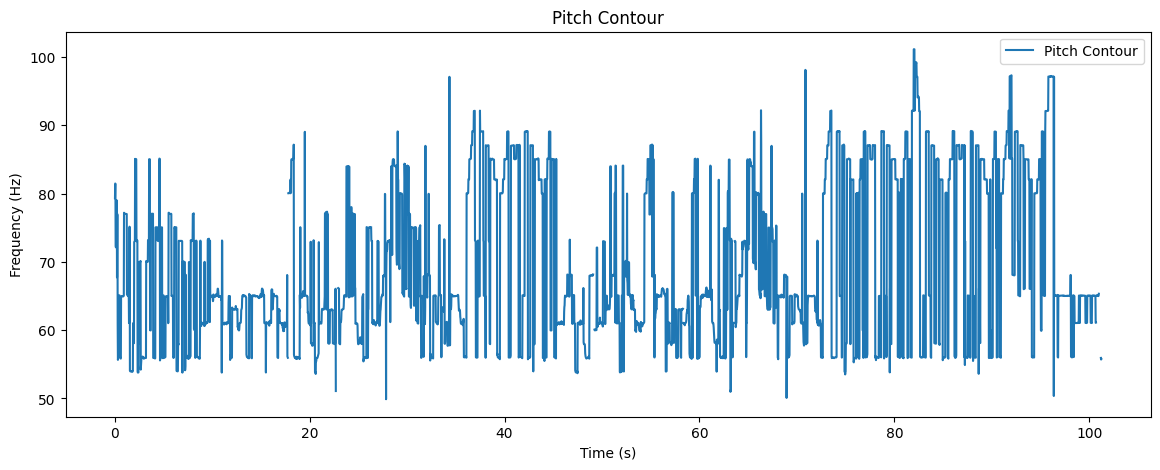

In [26]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def hz_to_midi(hz):
    return 69 + 12 * np.log2(hz/440.)

# Load the audio file
audio_file = 'data/music.wav'
y, sr = librosa.load(audio_file)

# Extract pitches using Harmonic-Percussive Source Separation (HPSS)
harmonic, percussive = librosa.effects.hpss(y)
pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr)

# Extract the maximum pitch per frame
pitch_array = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:
        pitch_array.append(pitch)
    else:
        pitch_array.append(np.nan)

midi_pitches = [hz_to_midi(p) if not np.isnan(p) else np.nan for p in pitch_array]
# Plot the pitch contour
times = librosa.times_like(np.array(midi_pitches), sr=sr)
print(times)
plt.figure(figsize=(14, 5))
plt.plot(times, midi_pitches, label='Pitch Contour')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
plt.legend()
plt.show()